In [3]:
import numpy as np
import pandas as pd
import seaborn as sns



"""" 
This dataset is named as water potability and it contain the reasearch about various areas water on the basis of some factor like ph, hardness, solid
etc and on the basis of these value we are deciding whether water of that area is safe to drink or not.So now we will clean this data and then visualize
it and remove all type of outliers so we got a cleaned data set in order to train a ML model on it that will for precise and accurate output.
"""

#loading dataframe
df = pd.read_csv("water_potability_ds2.csv")
#printing few entries to make sure that dataset is imported sucessfully
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# Step No.01 : Understanding Data

# Checking no. of columns and row i.e. Structure of data
df.shape
df.columns
# So it has 3276 rows and 10 columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.describe() 
# It show all the quick of all numerical data like mean , std, min, max etc for all columns

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
# if you want summary  all type of data then use

df.describe(include='all')

# it show even object type data summary but here in this dataset we don,t have any object type column

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
# If we just wanna know then its a x-ray like a quick go through of what type of data we have. 

df.info()
 # It provide col-name , non null count and datatype of dataset

# Here in this dataset mostly dtype are float because we are dealing with sensitive mathematical data that even decimal point matters alot.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
#It is used to get the datatype of columns
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<Axes: >

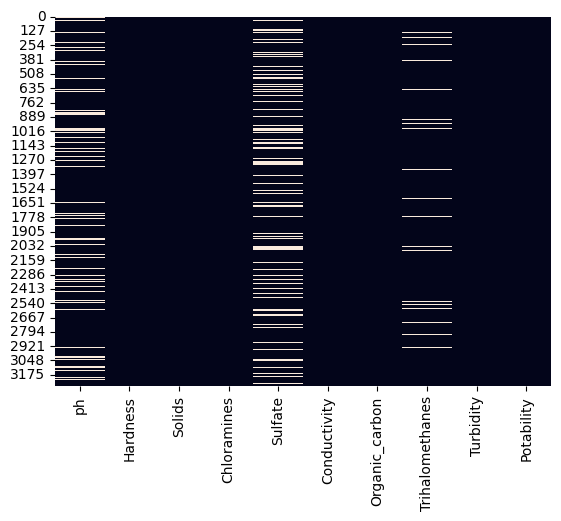

In [9]:
# now we check for missing values
""" 
So there are few column in which we have null value like ph,Sulfhate and Trihalomethane... now we will fill these value in order to make 
    this dataset more precise and accurate
   """
df.isnull().sum()

#Visualizing missing values by heatmap
sns.heatmap(df.isnull(), cbar=False)



In [10]:
# Cheking whether those column those have null values are skewed or not because we follow a simple rule for filling them up
 # As if not skewed then use mean value to fill and if skewed then use median

"""
If skewness is between -0.5 and 0.5 → Fairly symmetric, So we Use mean
&
If skewness is > 0.5 or < -0.5 → Skewed , So we  Use median


"""
# For ph column
df.ph.skew()
# here for ph column we got value 0.0256 which indicates that data is fairly symmetric so we use mean 


#for Sulphate column
df.Sulfate.skew()
# here for Sulphate column we got value -0.0359 which indicates that data is fairly symmetric so we use mean 


#for Trihalomethanes column
df.Trihalomethanes.skew()
# here for Trihalomethanes column we got value -0.0359 which indicates that data is fairly symmetric so we use mean 

np.float64(-0.08303067407901553)

In [11]:
# Checking duplicates values
df.duplicated().sum()
#These is no duplicate value present in the dataframe


np.int64(0)

In [12]:
# Just copying my original data into another so making sure that if i messed up with dataframe while filling missing value i already got a backup

df2 = df.copy()
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
# filling missing values with mean
df['ph'] = df['ph'].fillna(df['ph'].mean())

df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())


In [14]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
# Cross checking wether all null values arechanged or not 

# So results are showing there is no null value

In [16]:
# now  we are cleaning columns names like making them more accurate and readable
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns
# We got all columns name as short and in lower case

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

'\nAfter visualizing data , most of data looks normal and we have one column that is binary/discrete so when we train model,It can already handled by regression\n'

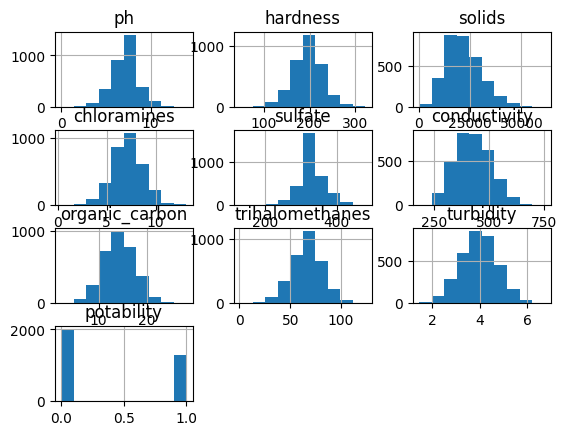

In [17]:
# Understanding each column >>> Univariate Analysis 

#Using Histogram
df.hist()

"""
After visualizing data , most of data looks normal and we have one column that is binary/discrete so when we train model,It can already handled by regression
"""

In [18]:
#Checking for skewness and kurtosis >>> help to identify normal distribution data
import scipy.stats as stats
skewness = stats.skew(df)
skewness

# we got skewness  between -0.5 to 0.5 which are close to zero so data is normal and for that one column where skewness = 0.62 we convert it into log in order to make it normal



array([ 0.02778315, -0.03932369,  0.62134982, -0.0120929 , -0.04116551,
        0.2643691 ,  0.02552089, -0.08512202, -0.00781306,  0.45057732])

In [19]:
#transforming Skewwed column using log to make data look uniform

#First cheking whether there are zero value rows are present or not
(df['solids'] == 0).sum()
#So there is no zero value row present

#Applying log
df['solids'] = np.log(df['solids'])
df.solids
df.solids.skew()
#Now skewness is pretty close to zero it mean that data is normally distributed 

np.float64(-1.1358113074915426)

<Axes: xlabel='ph', ylabel='solids'>

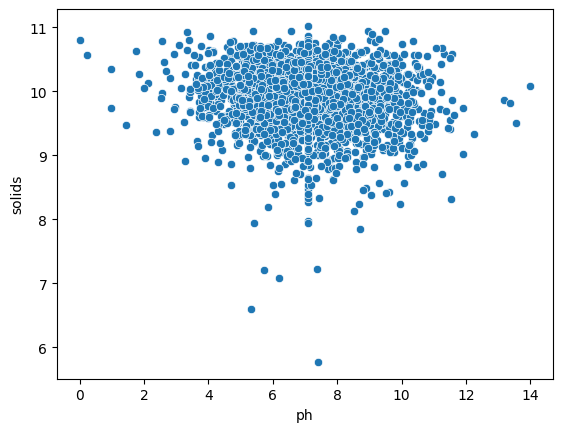

In [20]:
#Bivariate Analysis >>> Looking for relationship of two column with each other

#Plotting a scatterplot 
sns.scatterplot(x='ph', y='solids', data=df)




<Axes: >

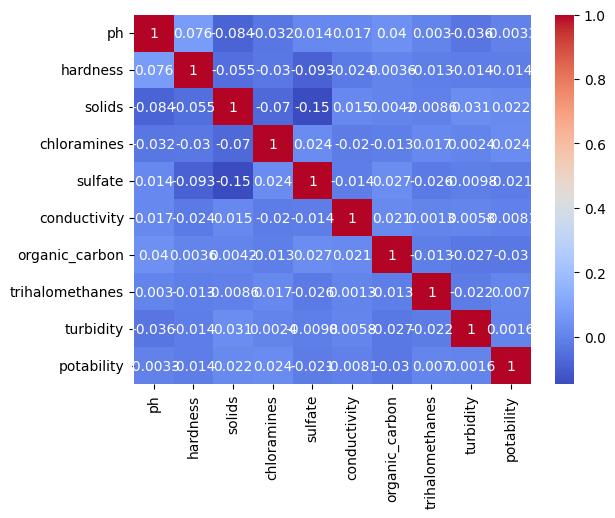

In [21]:
df.corr()   # Correlation matrix

#Generating a color coded heatmap using correlation values in order to understand how strongly values relate with each other
#annot=True >>Show actual correlation values 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') #cooldown for red and blue values
 

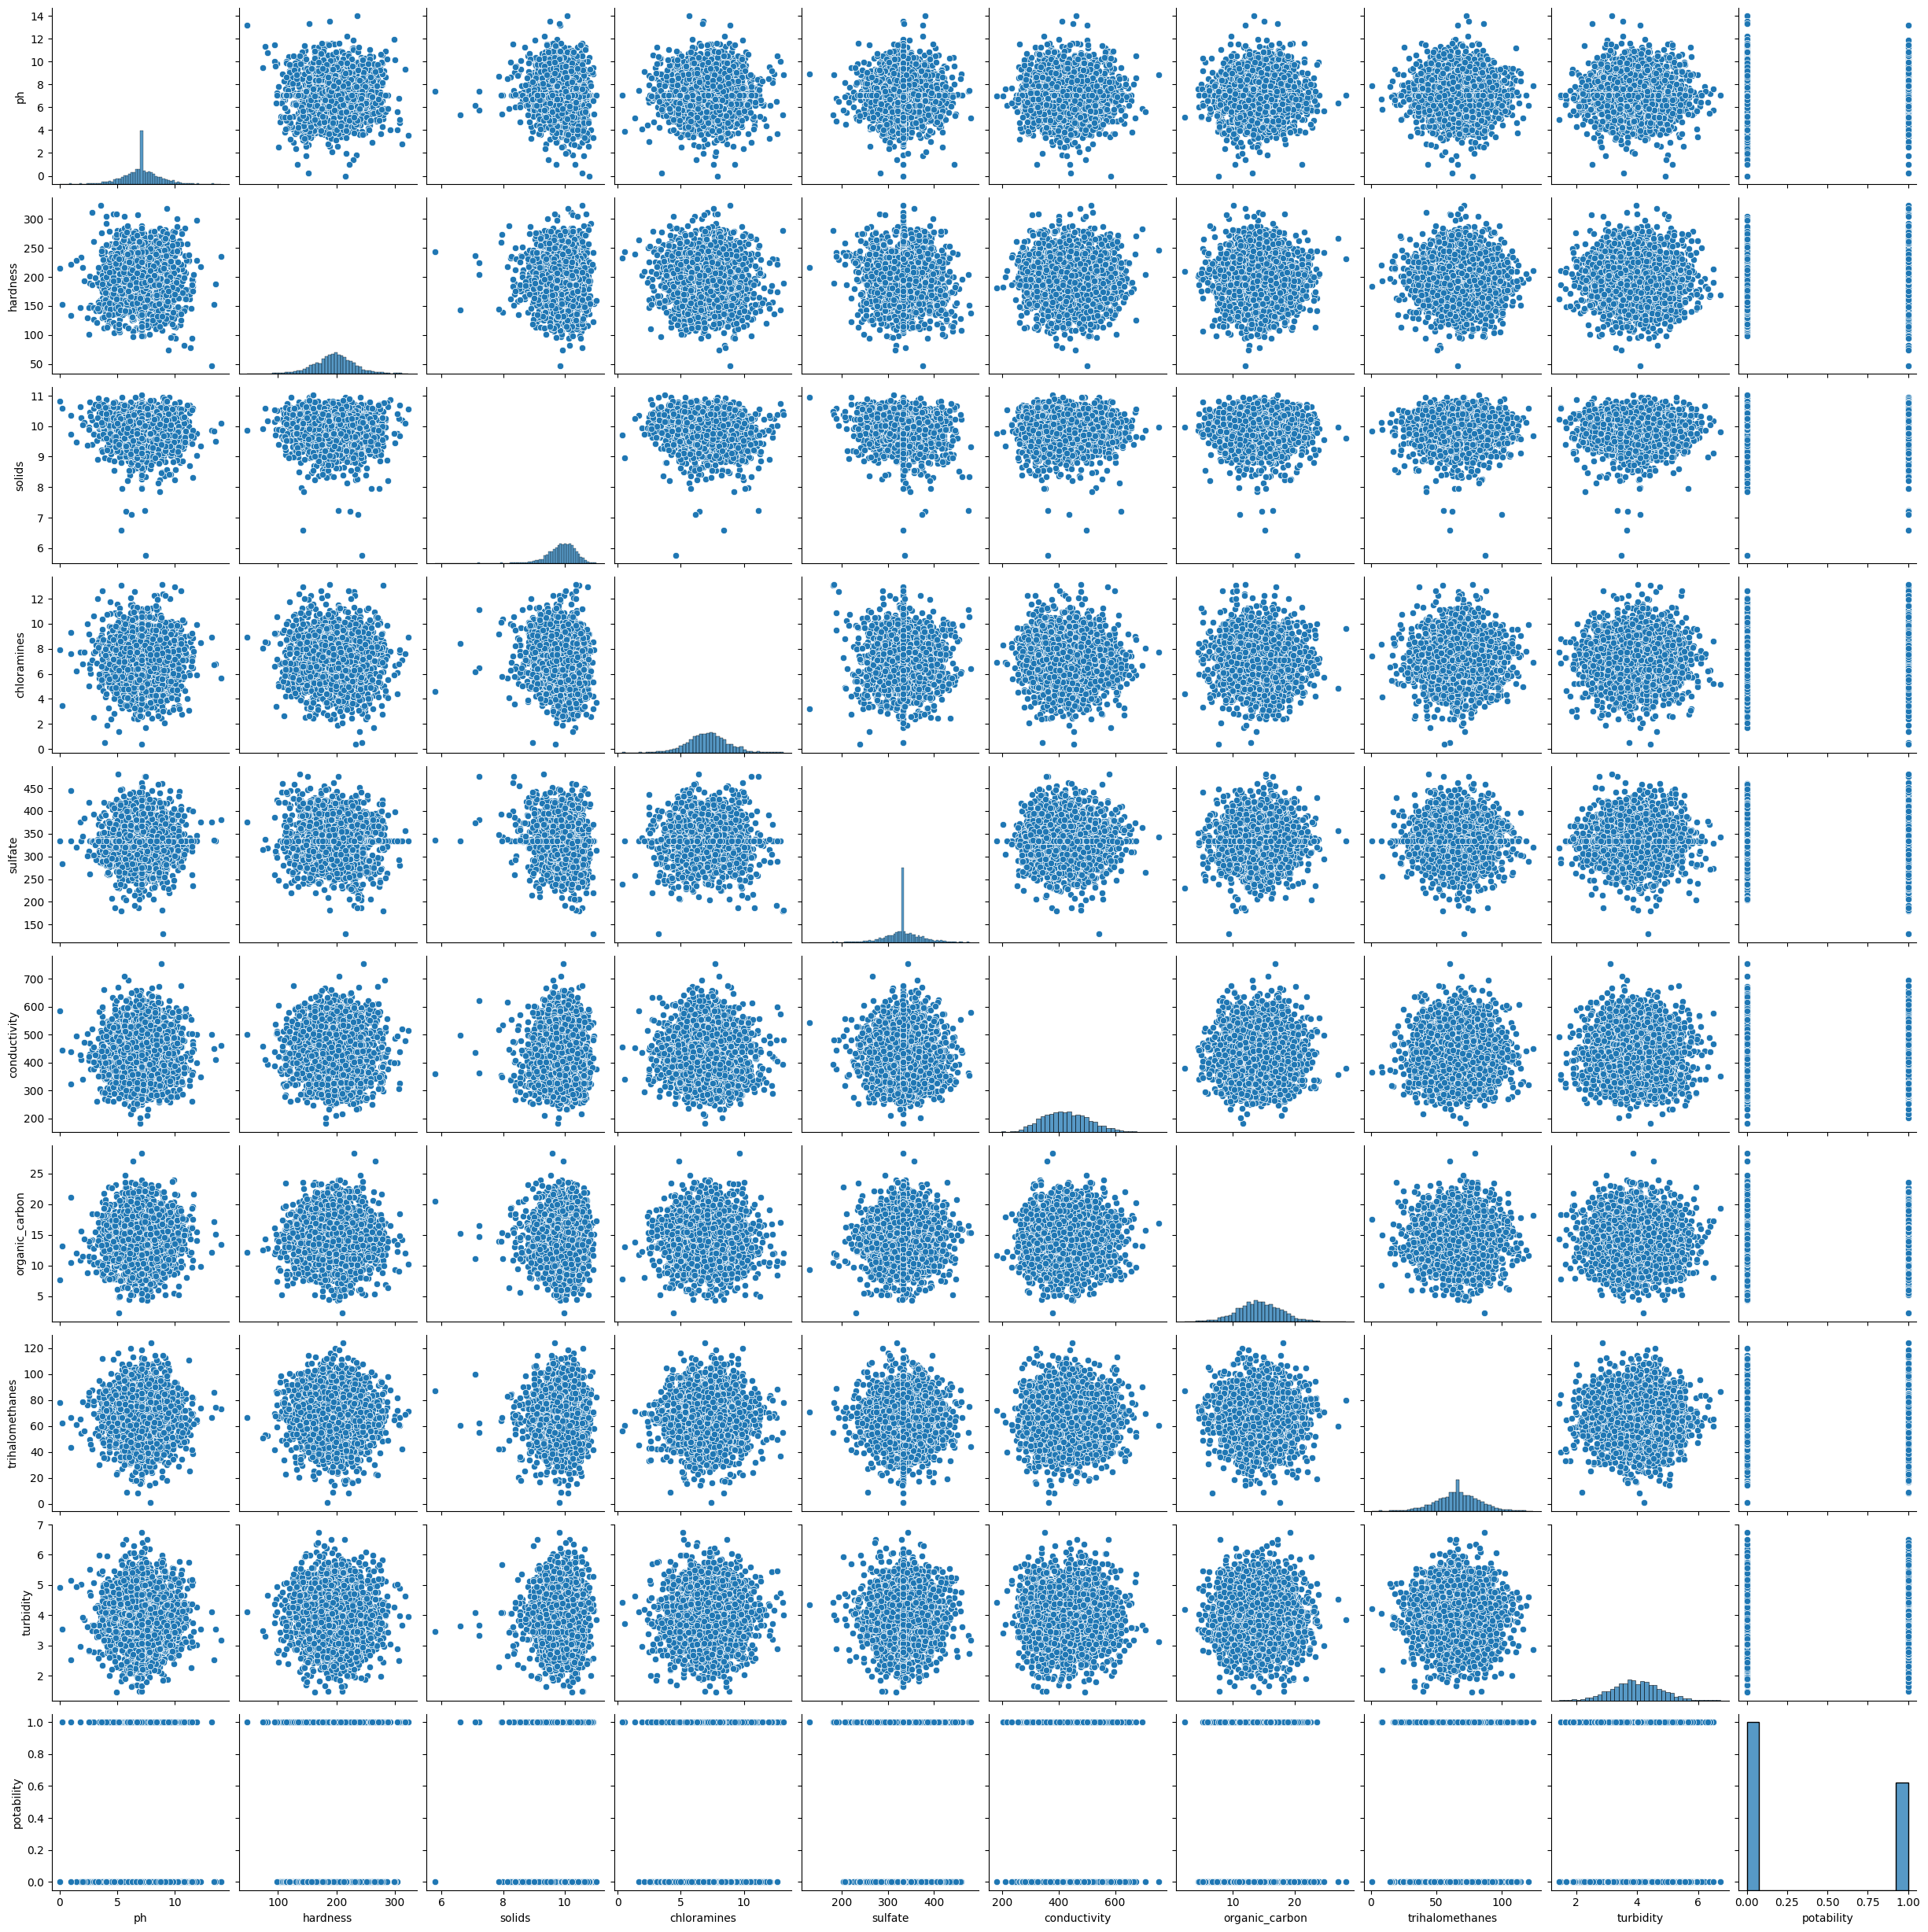

In [22]:
# Generating scatter plot atone for all plots

sns.pairplot(df)

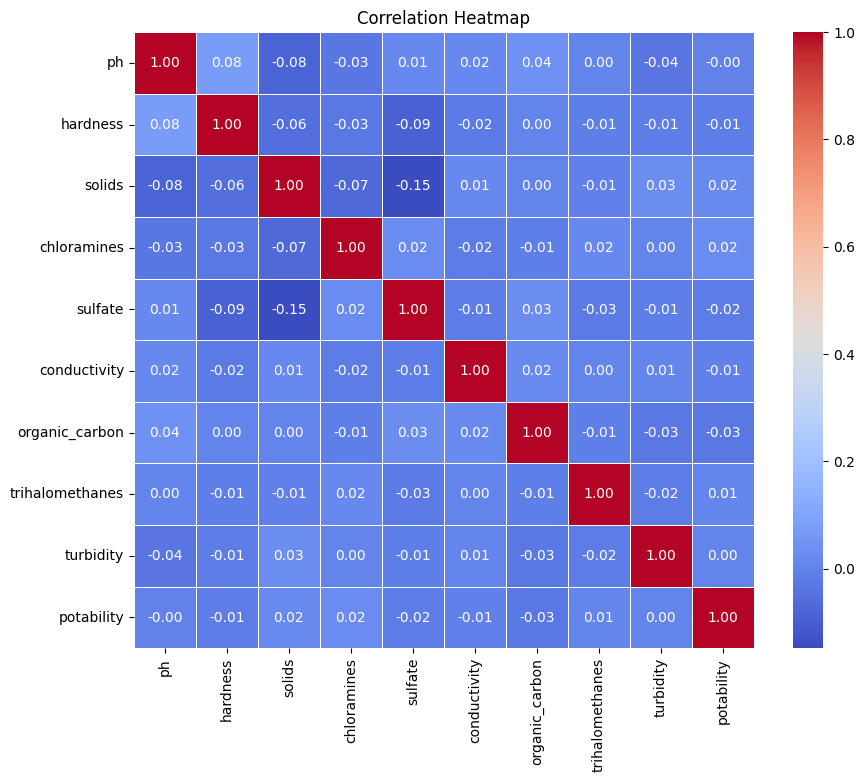

In [23]:
# generating corraltion matrix and heatmap for all pairs

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [24]:

df3 = df.copy()
df3.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.080795,204.890455,9.942291,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,9.832532,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,9.898954,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,9.999635,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,9.796959,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [25]:
#Removing outliner using IQR method
"""
def remove_outliers_iqr(data):
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
        
    return data

df = remove_outliers_iqr(df)

 #So we have sucessfully removed outliner 
 """

"\ndef remove_outliers_iqr(data):\n    for col in data.select_dtypes(include=['float64', 'int64']).columns:\n        Q1 = data[col].quantile(0.25)\n        Q3 = data[col].quantile(0.75)\n        IQR = Q3 - Q1\n        data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]\n\n    return data\n\ndf = remove_outliers_iqr(df)\n\n #So we have sucessfully removed outliner \n "

In [26]:


df=df3.copy()
df.shape

(3276, 10)

In [27]:
#Removing outliner using z-score because our data is almost normally distributed. otherwise we go for IQR method if data was skewed

#  Grab only numeric columns
num_df = df.select_dtypes(include=[np.number])

#  Function to calculate Z-score for a column
def get_z_score_series(series):
    mean = series.mean()
    std = series.std()
    return (series - mean) / std

#  Apply Z-score function to each column
z_scores_df = num_df.apply(get_z_score_series)

#  Keep rows where ALL Z-scores are within threshold (e.g. < 3)
df_clean = df[(z_scores_df.abs() < 3).all(axis=1)]

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


# So we removed outliner from each column sucessfully as shapes indicates that we almost removed 157 outliner 
# Now the Dataset is cleaned and normally distributed and almost ready to train a ML model

Original shape: (3276, 10)
Cleaned shape: (3119, 10)


In [28]:
df_clean.shape

(3119, 10)

In [29]:

df_clean = df_clean.reset_index(drop=True)
df_clean

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.080795,204.890455,9.942291,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,9.832532,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,9.898954,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,9.999635,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,9.796959,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3114,4.668102,193.681735,10.770189,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3115,7.808856,193.553212,9.760183,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3116,9.419510,175.762646,10.408966,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3117,5.126763,230.603758,9.391317,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [32]:
#Saving Cleaned Data for Modeling
df_clean.to_csv("cleaned_dataset_Water-Potability.csv",index=False)

In [31]:
#**************INSIGHTS*****************
"""
Water with **lower pH (< 6.5)** was more likely to be **not potable**.  
**High trihalomethane** levels slightly correlated with **non-potable** water.  
**Organic Carbon** above 20 may hint toward unsafe water conditions.   
Some features showed **non-linear** behavior with `Potability`, suggesting ML models may outperform simple logistic regression. 
"""

'\nWater with **lower pH (< 6.5)** was more likely to be **not potable**.  \n**High trihalomethane** levels slightly correlated with **non-potable** water.  \n**Organic Carbon** above 20 may hint toward unsafe water conditions.   \nSome features showed **non-linear** behavior with `Potability`, suggesting ML models may outperform simple logistic regression. \n'